In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
import os
os.chdir('/home/ankushraut/Downloads/Thirio')
plt.style.use('ggplot')
%matplotlib inline

wholesome = int(input("Enter 1 for global analysis or 0 for specific analysis : "))

Enter 1 for global analysis or 0 for specific analysis : 0


In [124]:
data = pd.read_csv('Dataset.csv')

In [125]:
data.head()

,Date,Day,Age,BMI,Sex,Ticket Size,Slab,Window,Discount,Revenue,Arrival Latitude,Arrival Longitude,Departure Latitude,Departure Longitude
0,4/1/2011,Fri,41,19.914635,F,160,L,23,58,67.2,28.084698,74.332608,27.016995,75.974701
1,4/1/2011,Fri,25,20.576554,M,140,S,21,4,134.4,27.348546,78.431045,28.815375,76.902033
2,4/1/2011,Fri,22,18.912289,F,140,M,25,84,22.4,29.800243,77.774801,26.976031,75.903889
3,4/1/2011,Fri,27,18.947945,M,160,M,27,46,86.4,29.069454,78.092282,29.335186,77.691905
4,4/1/2011,Fri,25,16.263913,M,160,S,46,57,68.8,30.203550,78.211570,27.250017,76.319986


In [126]:
data.describe()

,Age,BMI,Ticket Size,Window,Discount,Revenue,Arrival Latitude,Arrival Longitude,Departure Latitude,Departure Longitude
count,2715.000000,2715.000000,2715.000000,2715.000000,2715.000000,2715.000000,2715.000000,2715.000000,2715.000000,2715.000000
mean,32.064825,21.607135,150.180479,24.469982,48.998895,76.748950,28.320229,77.131536,28.307072,77.098951
std,7.157575,2.538028,22.354183,13.709566,29.501739,46.484974,1.096824,1.211352,1.085726,1.170751
min,20.000000,12.379538,120.000000,1.000000,0.000000,0.000000,24.702764,73.107449,24.709318,72.703745
25%,26.000000,19.915136,140.000000,13.000000,23.000000,36.400000,27.569896,76.303086,27.582974,76.281014
50%,32.000000,21.663707,140.000000,25.000000,50.000000,74.400000,28.312753,77.131863,28.319577,77.153880
75%,38.000000,23.312337,180.000000,36.000000,75.000000,113.400000,29.055108,77.960936,29.018157,77.900879
max,44.000000,30.051137,180.000000,48.000000,100.000000,180.000000,32.399044,81.516898,32.617616,82.097305


In [127]:
unique_dates = data.Date.unique()

In [128]:
uniqueness = []
for i in range(len(unique_dates)):
    uniqueness.append(unique_dates[i])

In [129]:
data['Date'] = pd.to_datetime(data['Date'])

In [130]:
data['month'] = data['Date'].dt.month
data['week'] = data['Date'].dt.week
data['day'] = data['Date'].dt.day
data['year'] = data['Date'].dt.year

In [131]:
order_distance = []
for i in range(len(data)):
    order_distance.append(abs(data['Arrival Latitude'][i]-data['Departure Latitude'][i])+abs(data['Arrival Longitude'][i]-data['Departure Longitude'][i]))

data['Order Distance'] = pd.DataFrame({'Order Distance':order_distance})

In [132]:
if wholesome == 0:
    desired_year = input("Enter the desired year to check: ")
    desired_month = input("Enter the desired month to check: ")
    desired_week = input("Enter the desired week to check: ")
    desired_day = input("Enter the desired day of the month to check: ")
    desired_date = input("Or enter the exact date in standard format: ")

Enter the desired year to check: 2011
Enter the desired month to check: 5
Enter the desired week to check: 3
Enter the desired day of the month to check: 17
Or enter the exact date in standard format: 2011-05-17


In [133]:
if wholesome == 0:
    if desired_year == '' and desired_date != '':
        desired_year = desired_date[:4]
    if desired_month == '' and desired_date != '':
        desired_month = desired_date[5:7]
    if desired_day == '' and desired_date != '':
        desired_day = desired_date[8:]
    if desired_week == '' and desired_date != '':
        if int(desired_day)<=7:
            desired_week = '1'
        elif int(desired_day)>=8 and int(desired_day)<=14:
            desired_week = '2'
        elif int(desired_day)>=15 and int(desired_day)<=21:
            desired_week = '3'
        elif int(desired_day)>=22 and int(desired_day)<=28:
            desired_week = '4'
        else:
            desired_week = '5'

In [134]:
if wholesome == 0:
    yearly_data = data[(data.year == int(desired_year))]
    monthly_data = yearly_data[(yearly_data.month == int(desired_month))]
    weekly_data = monthly_data[(monthly_data.day>=((int(desired_week)-1)*7 + 1))&(monthly_data.day<=((int(desired_week)-1)*7 + 8))]
    daily_data = monthly_data[(monthly_data.day == int(desired_day))]

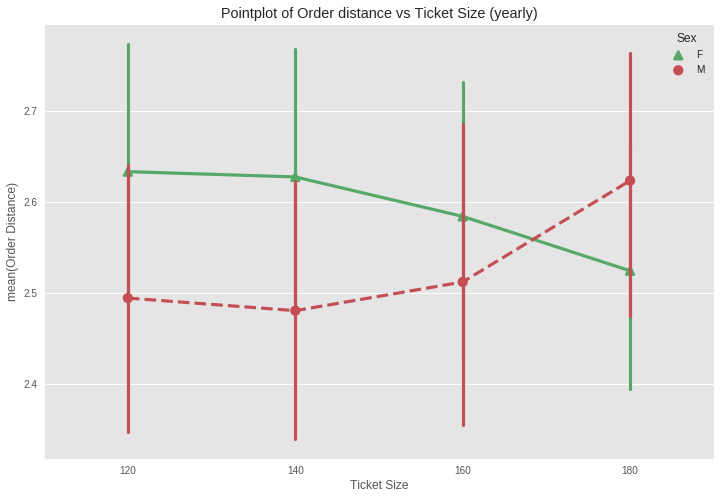

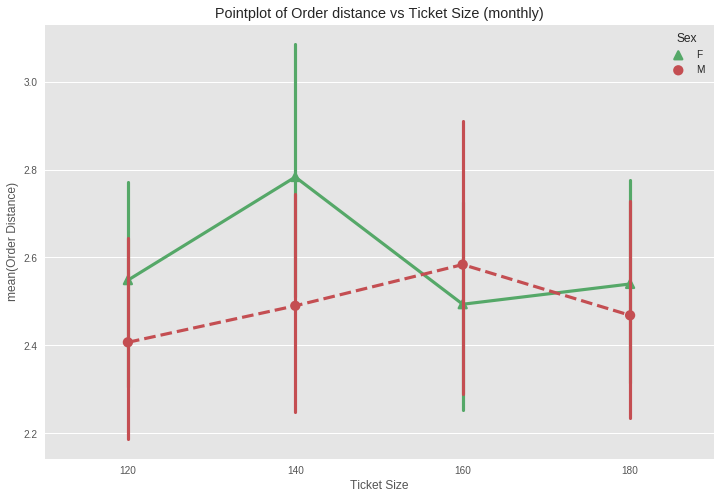

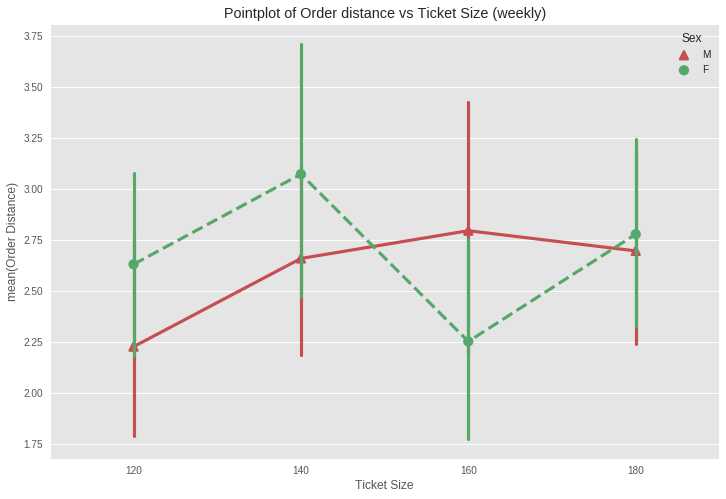

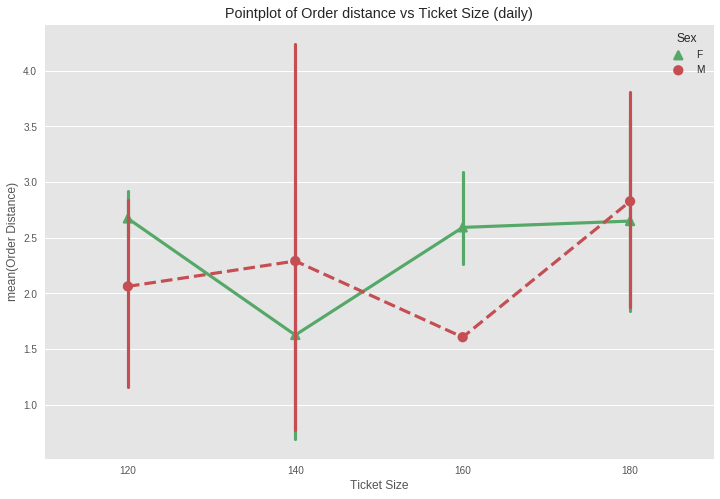

In [135]:
#Sex based pointplot of tickt size vs order distance
if wholesome == 1:
    sns.set(style="whitegrid", color_codes=True)
    plt.figure(figsize = (12,8))
    sns.pointplot(x=data['Ticket Size'], y=data['Order Distance'], hue = data['Sex'], palette={"M": "r", "F": "g"},
                  markers=["^", "o"], linestyles=["-", "--"])
    plt.title('Pointplot of Order distance vs Ticket Size (with confidence interval)')
    plt.show()
else:
    plt.figure(figsize = (12,8))
    sns.pointplot(x=yearly_data['Ticket Size'], y=yearly_data['Order Distance'], hue = yearly_data['Sex'], palette={"M": "r", "F": "g"},
                  markers=["^", "o"], linestyles=["-", "--"])
    plt.title('Pointplot of Order distance vs Ticket Size (yearly)')
    plt.show()
    
    plt.figure(figsize = (12,8))
    sns.pointplot(x=monthly_data['Ticket Size'], y=monthly_data['Order Distance'], hue = monthly_data['Sex'], palette={"M": "r", "F": "g"},
                  markers=["^", "o"], linestyles=["-", "--"])
    plt.title('Pointplot of Order distance vs Ticket Size (monthly)')
    plt.show()
    
    plt.figure(figsize = (12,8))
    sns.pointplot(x=weekly_data['Ticket Size'], y=weekly_data['Order Distance'], hue = weekly_data['Sex'], palette={"M": "r", "F": "g"},
                  markers=["^", "o"], linestyles=["-", "--"])
    plt.title('Pointplot of Order distance vs Ticket Size (weekly)')
    plt.show()
    
    plt.figure(figsize = (12,8))
    sns.pointplot(x=daily_data['Ticket Size'], y=daily_data['Order Distance'], hue = daily_data['Sex'], palette={"M": "r", "F": "g"},
                  markers=["^", "o"], linestyles=["-", "--"])
    plt.title('Pointplot of Order distance vs Ticket Size (daily)')
    plt.show()

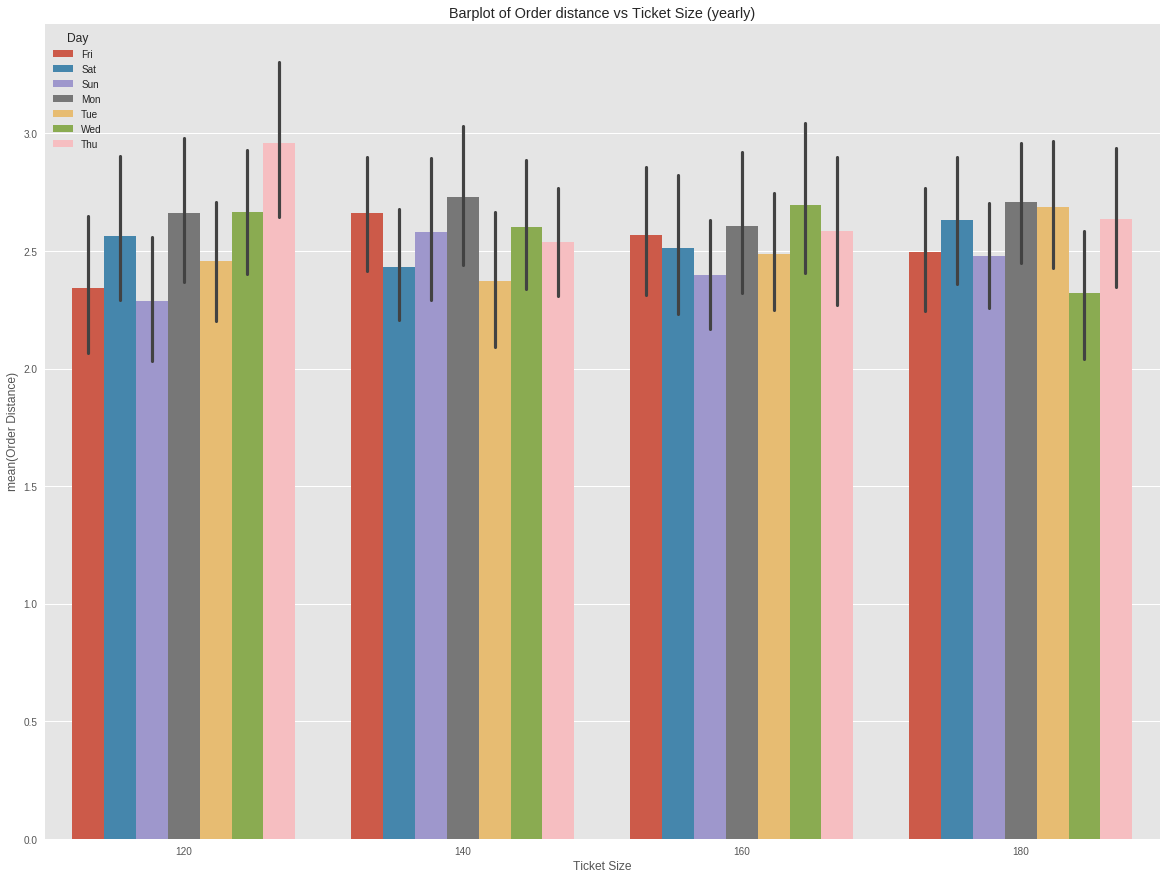

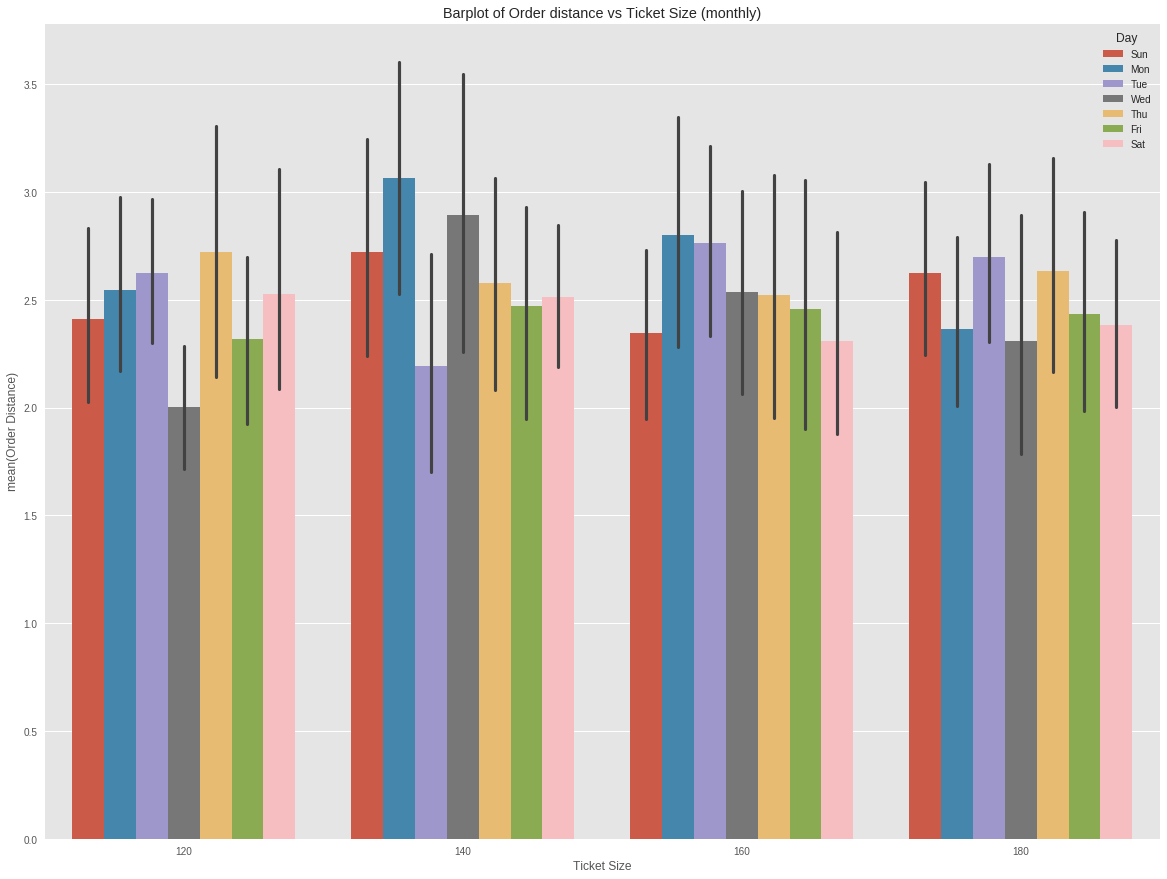

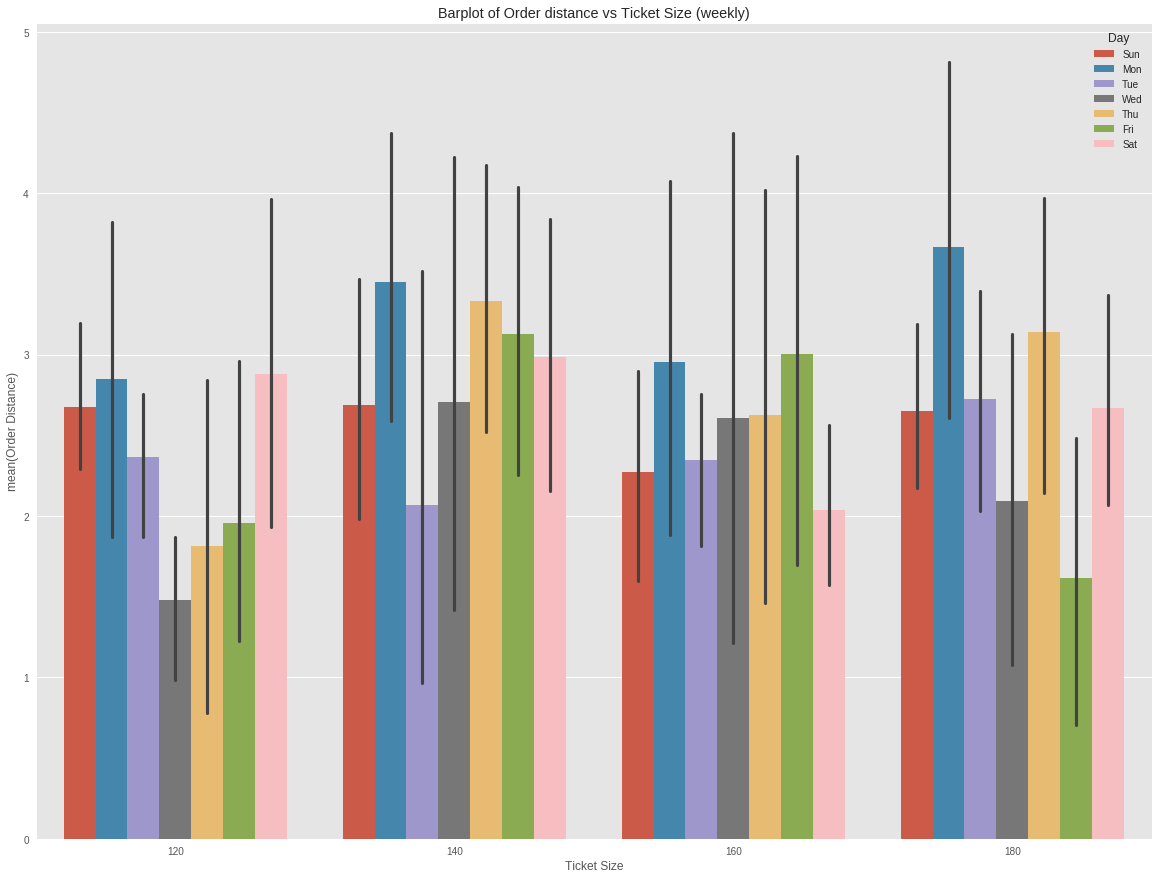

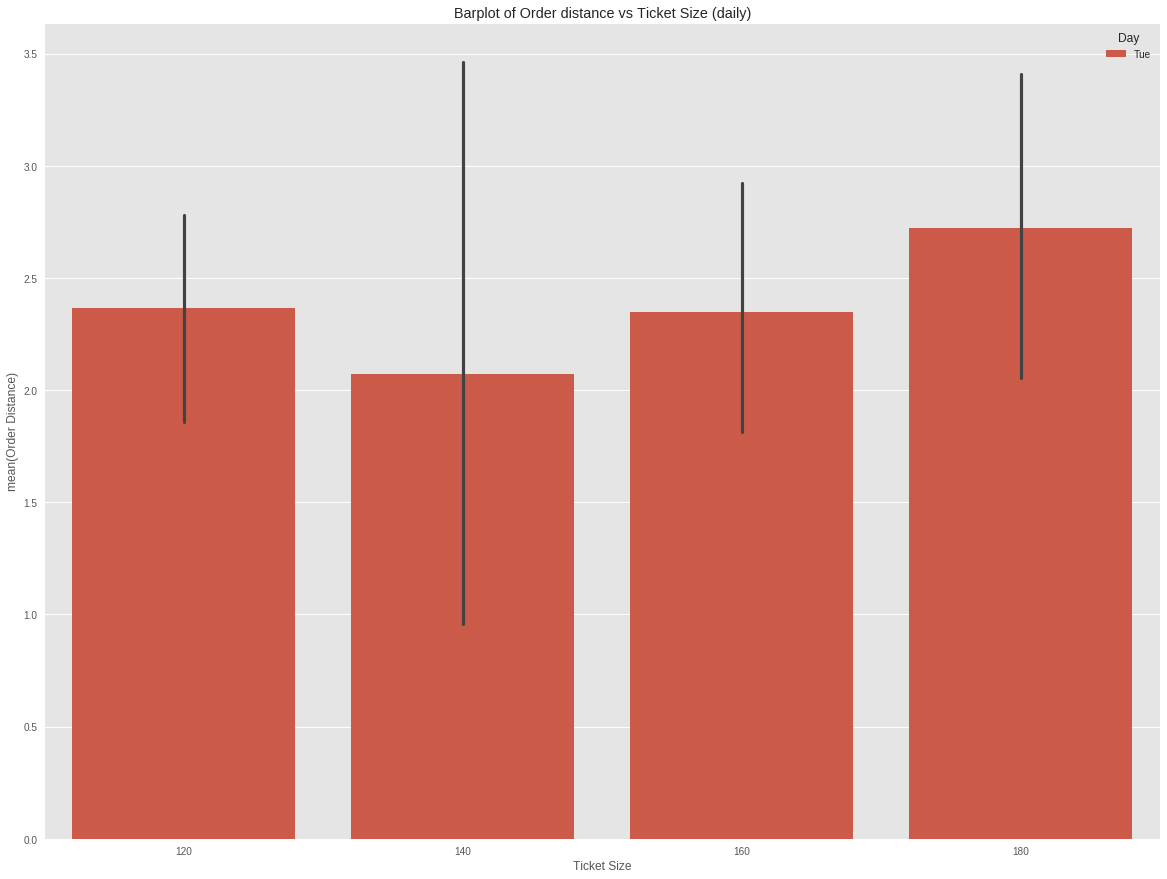

In [136]:
#daily basis barplot of ticket size vs order distance
if wholesome == 1:
    plt.figure(figsize = (20,15))
    sns.barplot(x=data['Ticket Size'], y=data['Order Distance'], hue = data['Day'])
    plt.title('Barplot of Order distance vs Ticket Size')
    plt.show()
else:
    plt.figure(figsize = (20,15))
    sns.barplot(x=yearly_data['Ticket Size'], y=yearly_data['Order Distance'], hue = yearly_data['Day'])
    plt.title('Barplot of Order distance vs Ticket Size (yearly)')
    plt.show()
    
    plt.figure(figsize = (20,15))
    sns.barplot(x=monthly_data['Ticket Size'], y=monthly_data['Order Distance'], hue = monthly_data['Day'])
    plt.title('Barplot of Order distance vs Ticket Size (monthly)')
    plt.show()
    
    plt.figure(figsize = (20,15))
    sns.barplot(x=weekly_data['Ticket Size'], y=weekly_data['Order Distance'], hue = weekly_data['Day'])
    plt.title('Barplot of Order distance vs Ticket Size (weekly)')
    plt.show()
    
    plt.figure(figsize = (20,15))
    sns.barplot(x=daily_data['Ticket Size'], y=daily_data['Order Distance'], hue = daily_data['Day'])
    plt.title('Barplot of Order distance vs Ticket Size (daily)')
    plt.show()

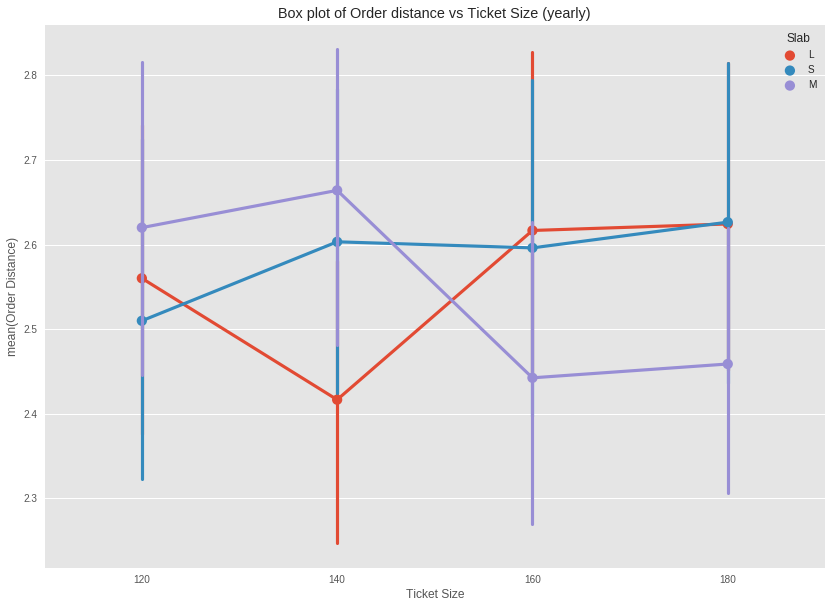

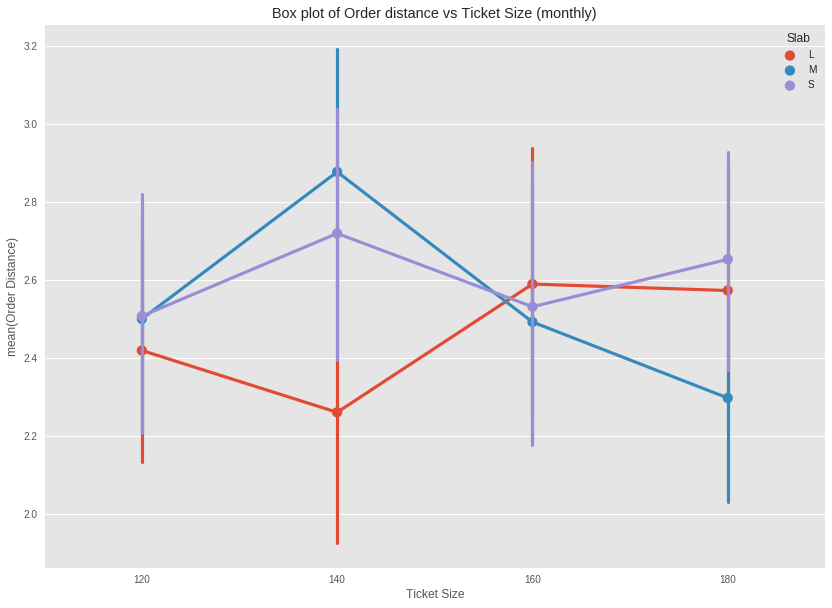

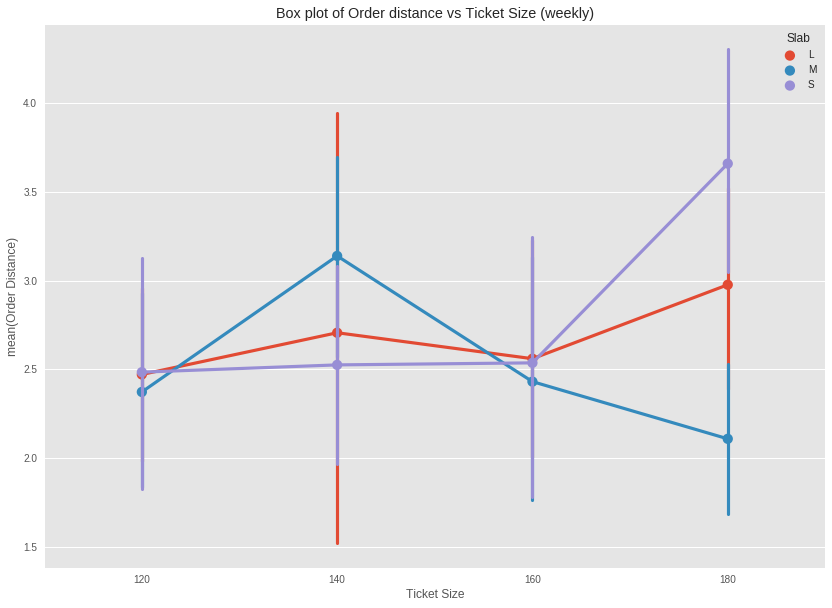

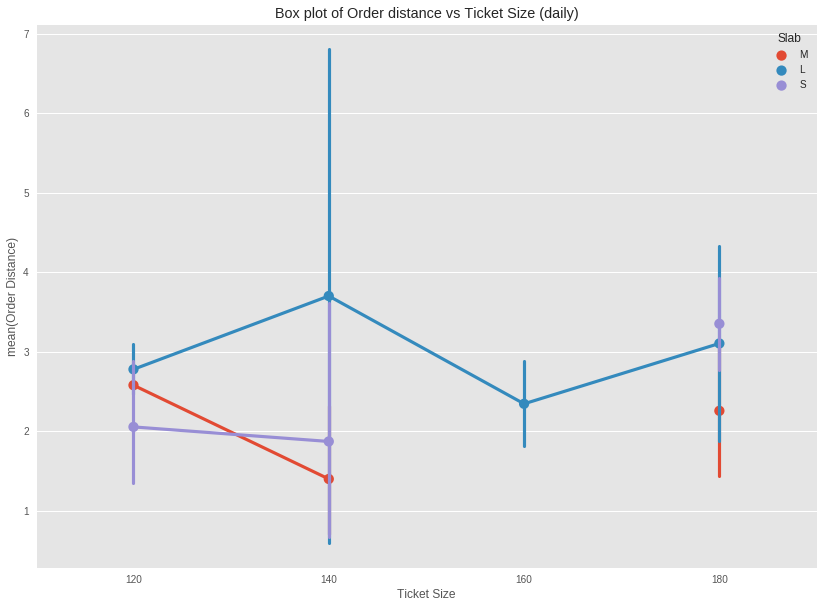

In [137]:
#Slab based boxplot of ticket size vs order distance
if wholesome == 1:
    plt.figure(figsize = (14,10))
    sns.pointplot(x=data['Ticket Size'], y=data['Order Distance'], hue = data['Slab'])
    plt.title('Box plot of Order distance vs Ticket Size')
    plt.show()
else:
    plt.figure(figsize = (14,10))
    sns.pointplot(x=yearly_data['Ticket Size'], y=yearly_data['Order Distance'], hue = yearly_data['Slab'])
    plt.title('Box plot of Order distance vs Ticket Size (yearly)')
    plt.show()
    
    plt.figure(figsize = (14,10))
    sns.pointplot(x=monthly_data['Ticket Size'], y=monthly_data['Order Distance'], hue = monthly_data['Slab'])
    plt.title('Box plot of Order distance vs Ticket Size (monthly)')
    plt.show()
    
    plt.figure(figsize = (14,10))
    sns.pointplot(x=weekly_data['Ticket Size'], y=weekly_data['Order Distance'], hue = weekly_data['Slab'])
    plt.title('Box plot of Order distance vs Ticket Size (weekly)')
    plt.show()
    
    plt.figure(figsize = (14,10))
    sns.pointplot(x=daily_data['Ticket Size'], y=daily_data['Order Distance'], hue = daily_data['Slab'])
    plt.title('Box plot of Order distance vs Ticket Size (daily)')
    plt.show()

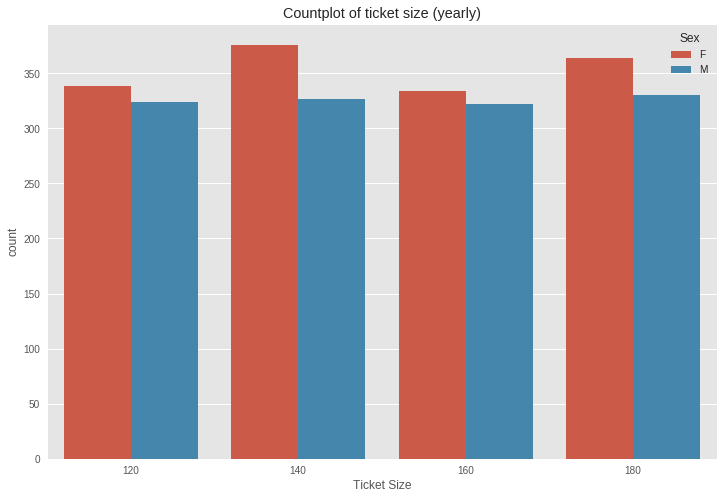

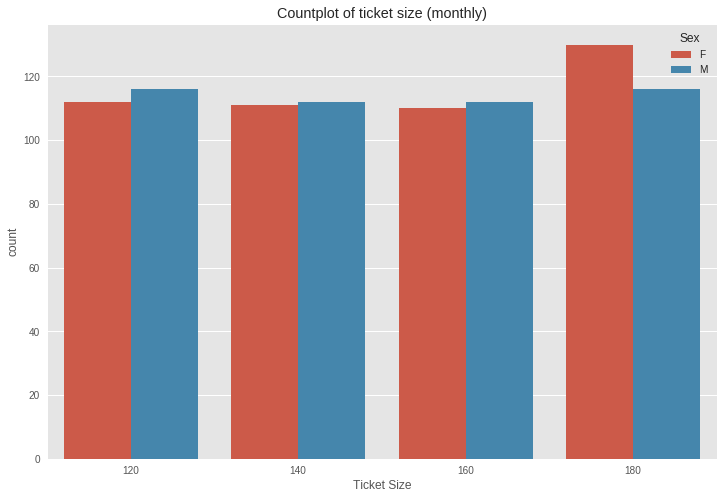

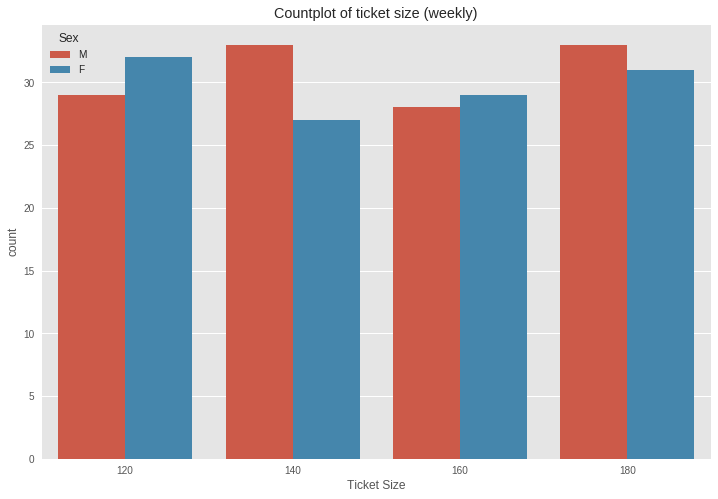

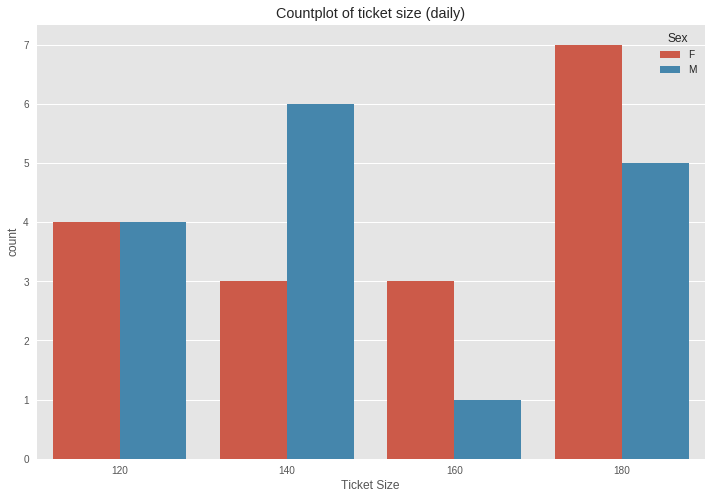

In [138]:
#simple countplot of ticket size
if wholesome == 1:
    plt.figure(figsize = (12,8))
    sns.countplot(x=data['Ticket Size'], hue=data['Sex'])
    plt.title('Countplot of ticket size')
    plt.show()
else:
    plt.figure(figsize = (12,8))
    sns.countplot(x=yearly_data['Ticket Size'], hue=yearly_data['Sex'])
    plt.title('Countplot of ticket size (yearly)')
    plt.show()
    
    plt.figure(figsize = (12,8))
    sns.countplot(x=monthly_data['Ticket Size'], hue=monthly_data['Sex'])
    plt.title('Countplot of ticket size (monthly)')
    plt.show()
    
    plt.figure(figsize = (12,8))
    sns.countplot(x=weekly_data['Ticket Size'], hue=weekly_data['Sex'])
    plt.title('Countplot of ticket size (weekly)')
    plt.show()
    
    plt.figure(figsize = (12,8))
    sns.countplot(x=daily_data['Ticket Size'], hue=daily_data['Sex'])
    plt.title('Countplot of ticket size (daily)')
    plt.show()

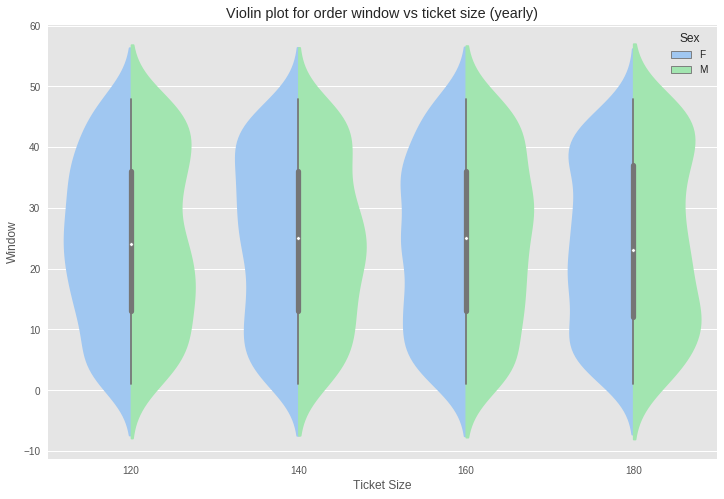

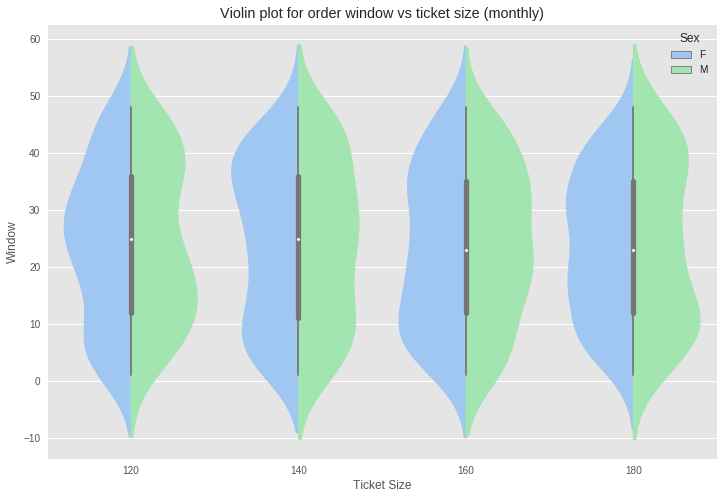

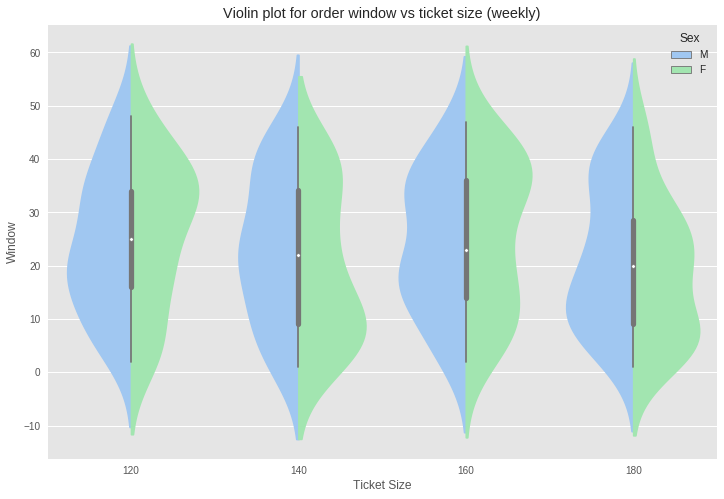

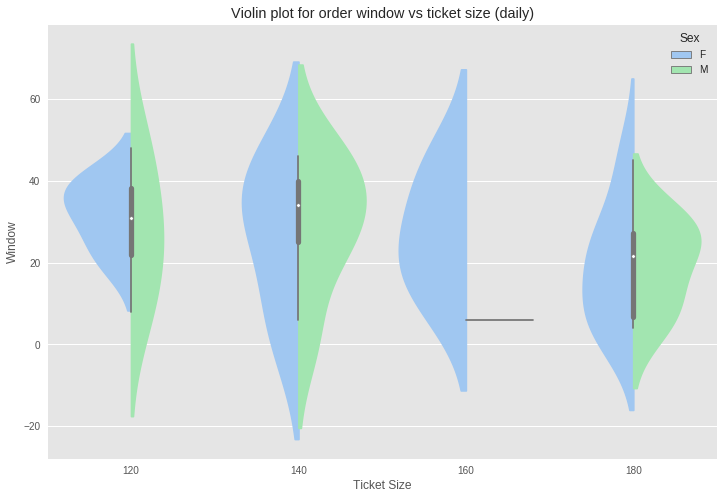

In [139]:
#Violinplot of order window vs ticket size
if wholesome == 1:
    plt.figure(figsize = (12,8))
    sns.violinplot(data['Ticket Size'], data['Window'], hue = data['Sex'], split = True)
    plt.title('Violin plot for order window vs ticket size')
    plt.show()
else:
    plt.figure(figsize = (12,8))
    sns.violinplot(yearly_data['Ticket Size'], yearly_data['Window'], hue = yearly_data['Sex'], split = True, palette = 'pastel')
    plt.title('Violin plot for order window vs ticket size (yearly)')
    plt.show()

    plt.figure(figsize = (12,8))
    sns.violinplot(monthly_data['Ticket Size'], monthly_data['Window'], hue = monthly_data['Sex'], split = True, palette = 'pastel')
    plt.title('Violin plot for order window vs ticket size (monthly)')
    plt.show()

    plt.figure(figsize = (12,8))
    sns.violinplot(weekly_data['Ticket Size'], weekly_data['Window'], hue = weekly_data['Sex'], split = True, palette = 'pastel')
    plt.title('Violin plot for order window vs ticket size (weekly)')
    plt.show()

    plt.figure(figsize = (12,8))
    sns.violinplot(daily_data['Ticket Size'], daily_data['Window'], hue = daily_data['Sex'], split=True, palette = 'pastel')
    plt.title('Violin plot for order window vs ticket size (daily)')
    plt.show()

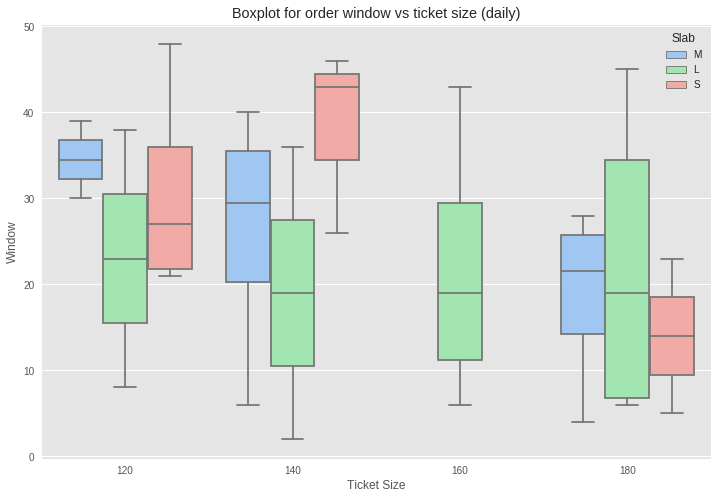

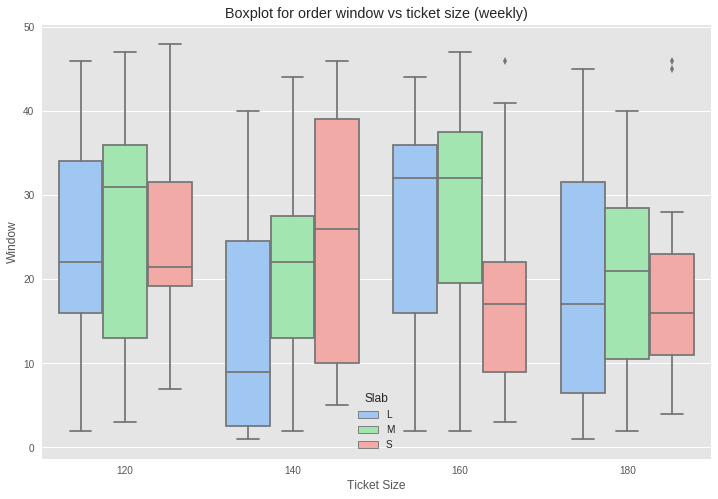

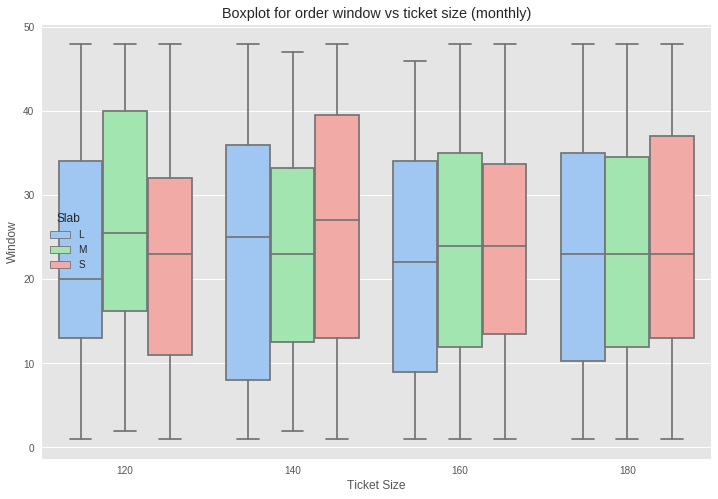

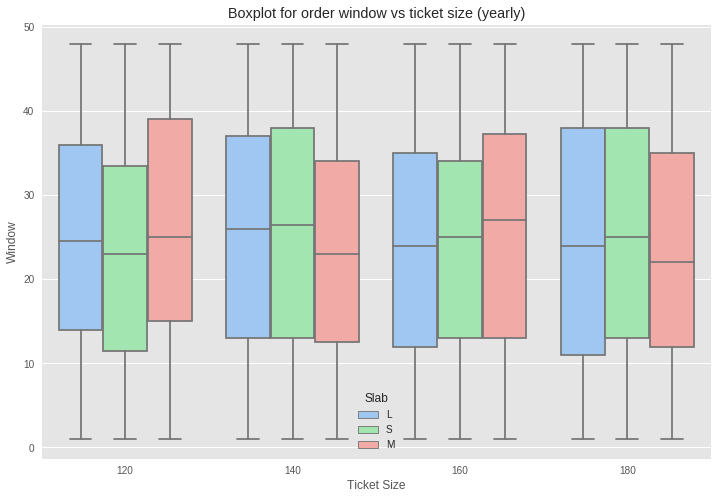

In [140]:
#boxplot for order window vs ticket size
if wholesome == 1:
    plt.figure(figsize = (12,8))
    sns.boxplot(data['Ticket Size'], data['Window'], hue = data['Slab'])
    plt.title('Boxplot for order window vs ticket size')
    plt.show()
else:
    plt.figure(figsize = (12,8))
    sns.boxplot(daily_data['Ticket Size'], daily_data['Window'], hue = daily_data['Slab'], palette = 'pastel')
    plt.title('Boxplot for order window vs ticket size (daily)')
    plt.show()

    plt.figure(figsize = (12,8))
    sns.boxplot(weekly_data['Ticket Size'], weekly_data['Window'], hue = weekly_data['Slab'], palette = 'pastel')
    plt.title('Boxplot for order window vs ticket size (weekly)')
    plt.show()

    plt.figure(figsize = (12,8))
    sns.boxplot(monthly_data['Ticket Size'], monthly_data['Window'], hue = monthly_data['Slab'], palette = 'pastel')
    plt.title('Boxplot for order window vs ticket size (monthly)')
    plt.show()

    plt.figure(figsize = (12,8))
    sns.boxplot(yearly_data['Ticket Size'], yearly_data['Window'], hue = yearly_data['Slab'], palette = 'pastel')
    plt.title('Boxplot for order window vs ticket size (yearly)')
    plt.show()

In [141]:
#splitting data on daily basis
order_volume = []

for i in uniqueness:
    daily_data = data[data.Date == i]
    order_volume.append(len(daily_data))

In [142]:
#plotting order volume and lags
orderVolume = pd.Series(order_volume)
weekLag = orderVolume.shift(-7)

volume_df = pd.DataFrame({'Order Volume':order_volume, 'Week Lag':weekLag})

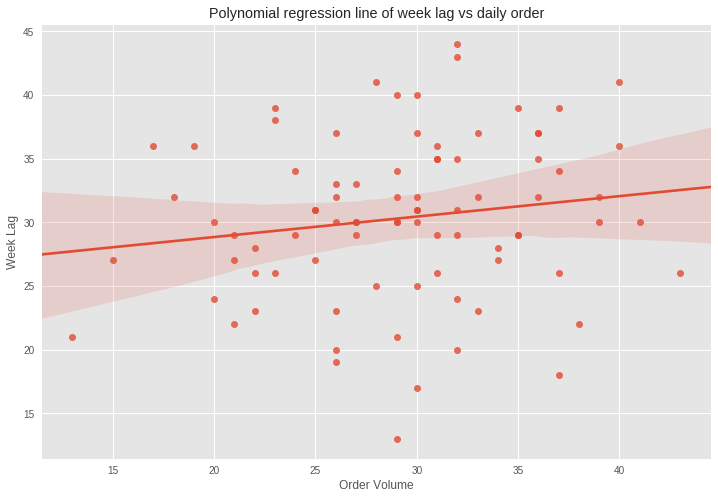

In [143]:
plt.figure(figsize = (12,8))
sns.regplot(volume_df['Order Volume'], volume_df['Week Lag'], ci = 99, order=1)
plt.title('Polynomial regression line of week lag vs daily order')
plt.show()

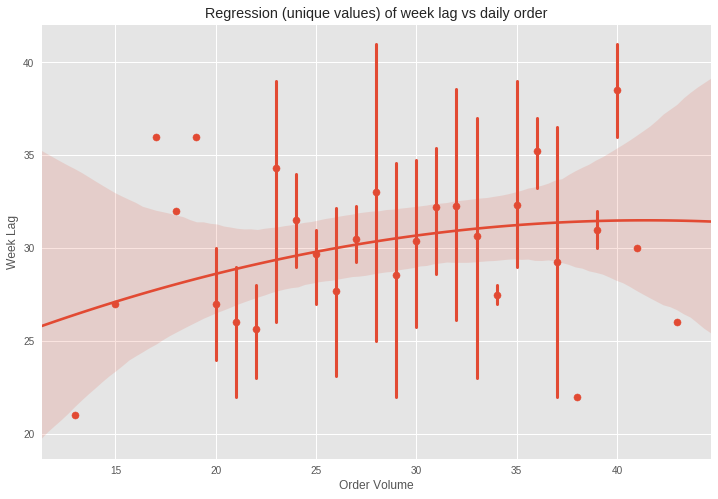

In [144]:
plt.figure(figsize = (12,8))
sns.regplot(volume_df['Order Volume'], volume_df['Week Lag'], ci = 95, x_estimator = np.mean, order = 2)
plt.title('Regression (unique values) of week lag vs daily order')
plt.show()

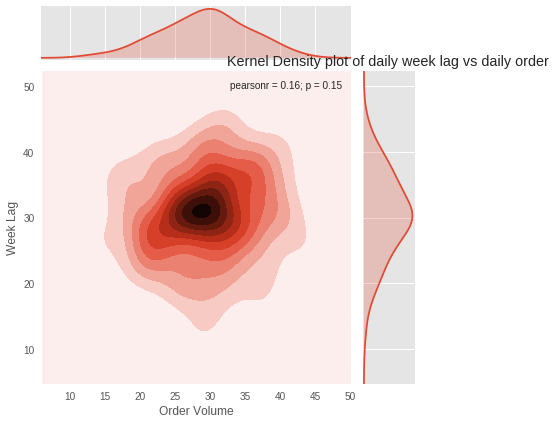

In [145]:
plt.figure(figsize = (12,8))
sns.jointplot(volume_df['Order Volume'], volume_df['Week Lag'], kind = 'kde')
plt.title('Kernel Density plot of daily week lag vs daily order')
plt.show()

In [146]:
#inference -> Generally if no. of tickets have been less on one day then those have been
# more on the corresponding day of the next week and vice versa

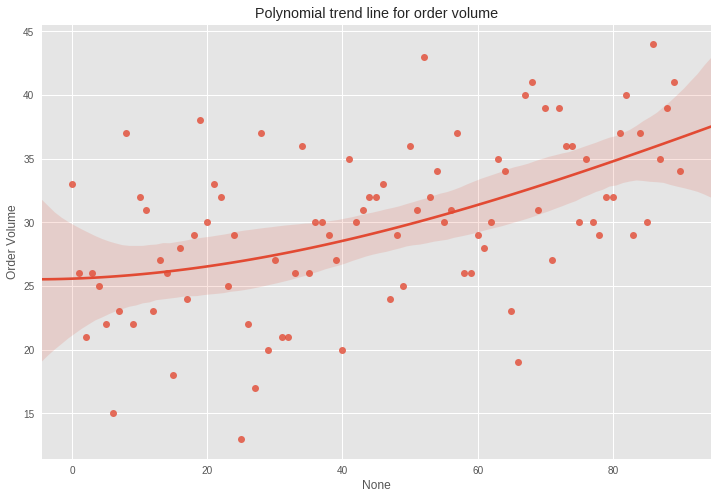

In [147]:
#Trend line for no. of orders

x = pd.Series(list(range(91)))
plt.figure(figsize = (12,8))
sns.regplot(x, volume_df['Order Volume'], ci = 95, order=3)
plt.title('Polynomial trend line for order volume')
plt.show()

In [148]:
data.head()

,Date,Day,Age,BMI,Sex,Ticket Size,Slab,Window,Discount,Revenue,Arrival Latitude,Arrival Longitude,Departure Latitude,Departure Longitude,month,week,day,year,Order Distance
0,2011-04-01,Fri,41,19.914635,F,160,L,23,58,67.2,28.084698,74.332608,27.016995,75.974701,4,13,1,2011,2.709797
1,2011-04-01,Fri,25,20.576554,M,140,S,21,4,134.4,27.348546,78.431045,28.815375,76.902033,4,13,1,2011,2.995841
2,2011-04-01,Fri,22,18.912289,F,140,M,25,84,22.4,29.800243,77.774801,26.976031,75.903889,4,13,1,2011,4.695124
3,2011-04-01,Fri,27,18.947945,M,160,M,27,46,86.4,29.069454,78.092282,29.335186,77.691905,4,13,1,2011,0.666110
4,2011-04-01,Fri,25,16.263913,M,160,S,46,57,68.8,30.203550,78.211570,27.250017,76.319986,4,13,1,2011,4.845117


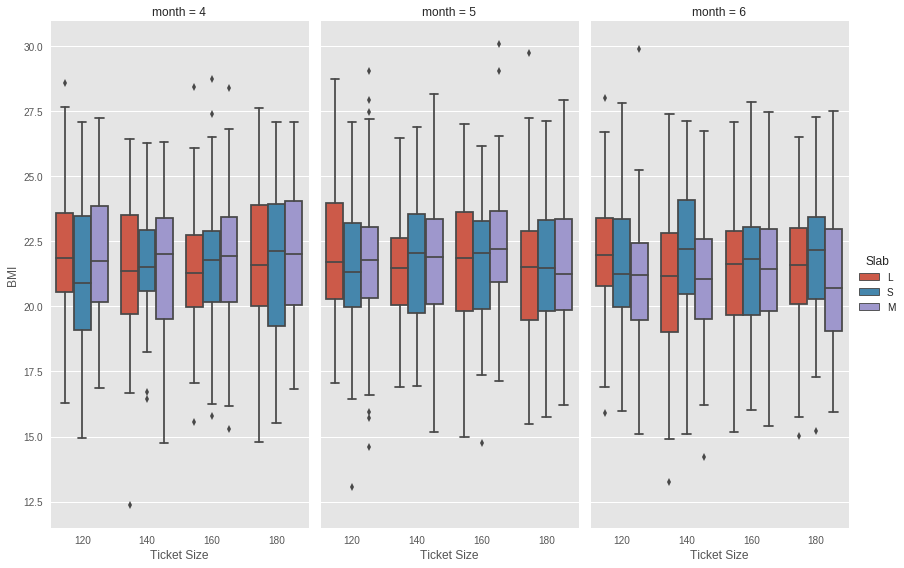

In [149]:
#monthwise BMI vs ticket_size
sns.factorplot(x="Ticket Size", y="BMI", hue="Slab",
               col="month", data=data, kind="box", size=8, aspect=.5)
plt.show()

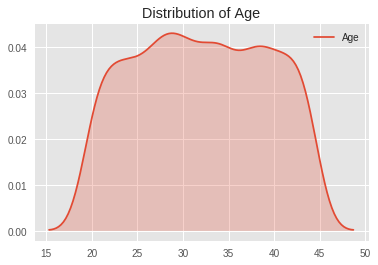

In [150]:
sns.kdeplot(data['Age'], shade = True)
plt.title('Distribution of Age')
plt.show()

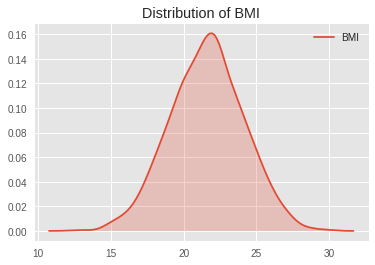

In [151]:
sns.kdeplot(data['BMI'], shade = True)
plt.title('Distribution of BMI')
plt.show()

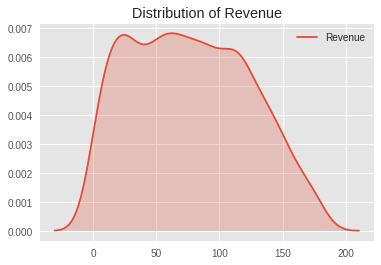

In [152]:
sns.kdeplot(data['Revenue'], shade = True)
plt.title('Distribution of Revenue')
plt.show()

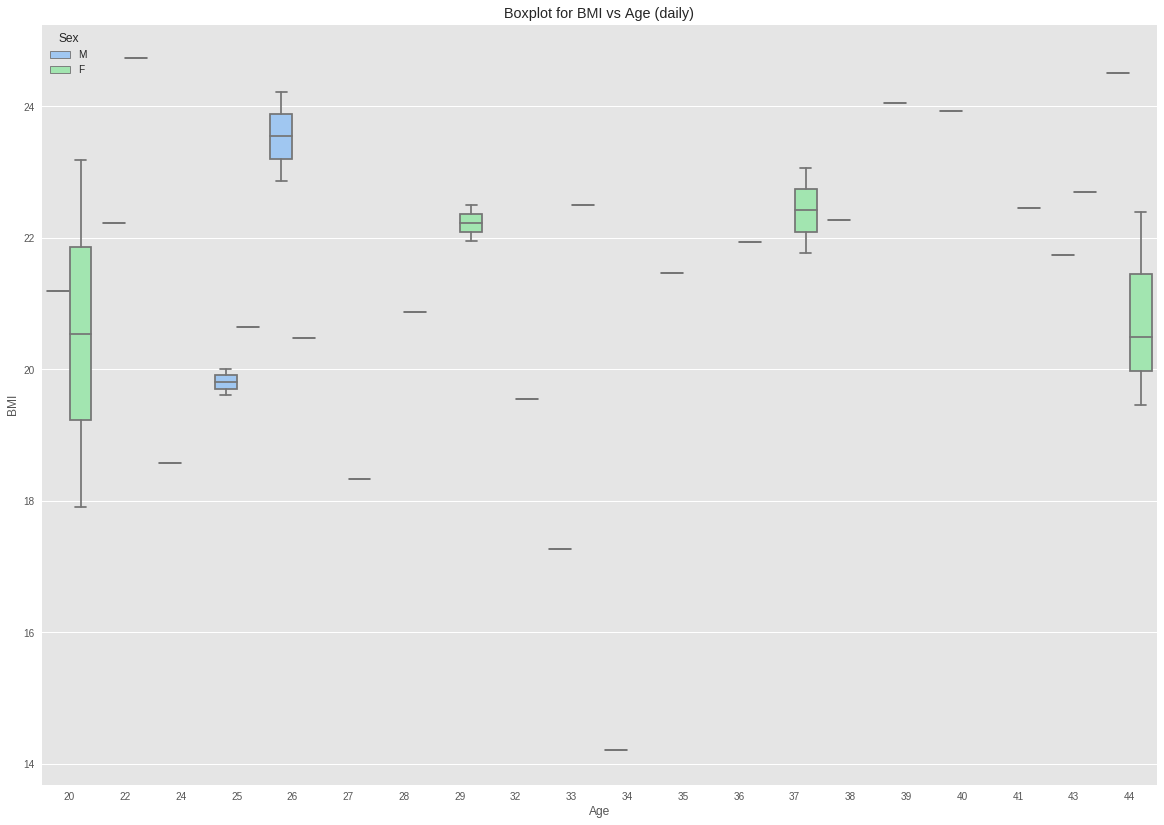

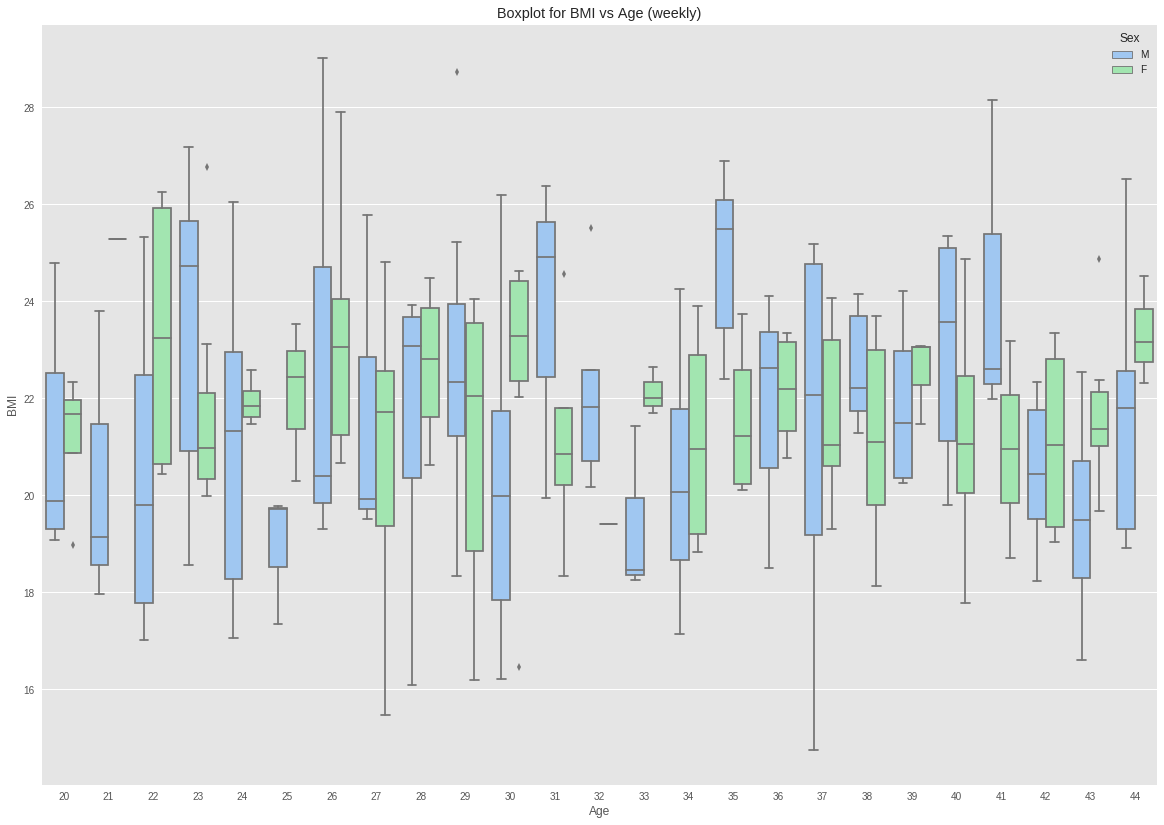

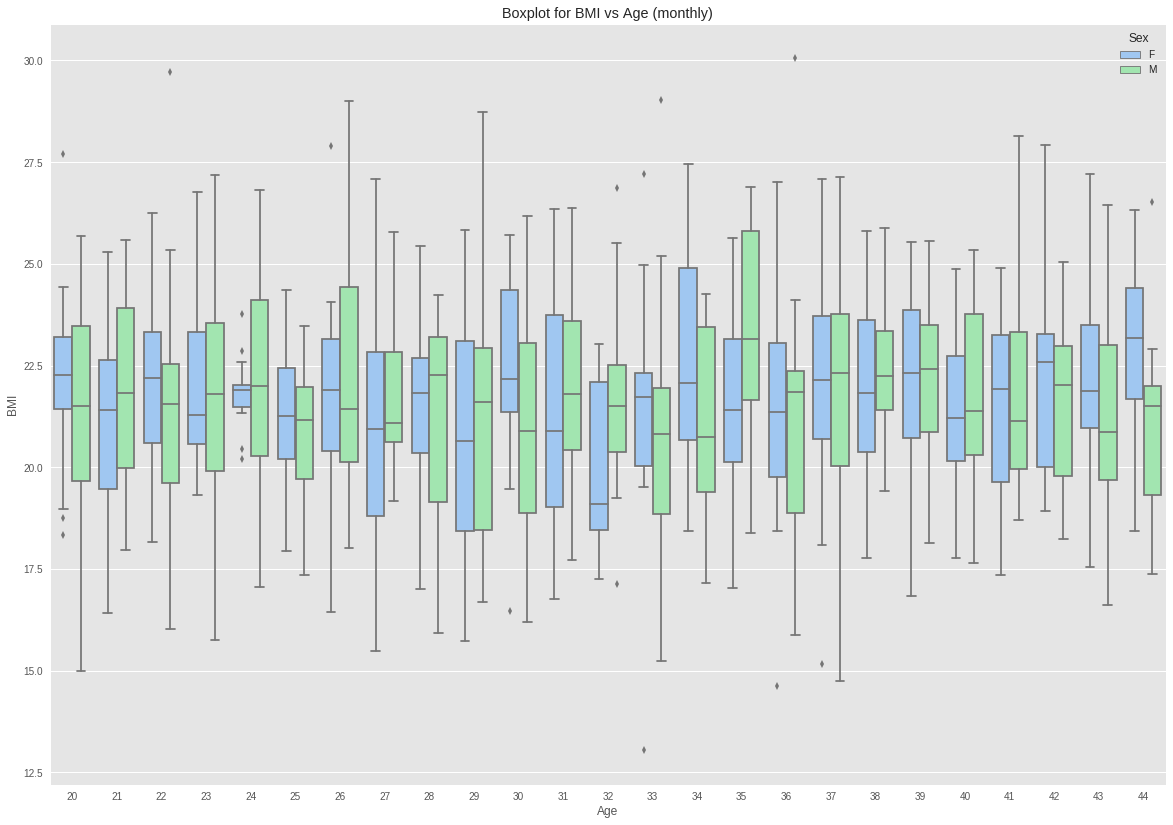

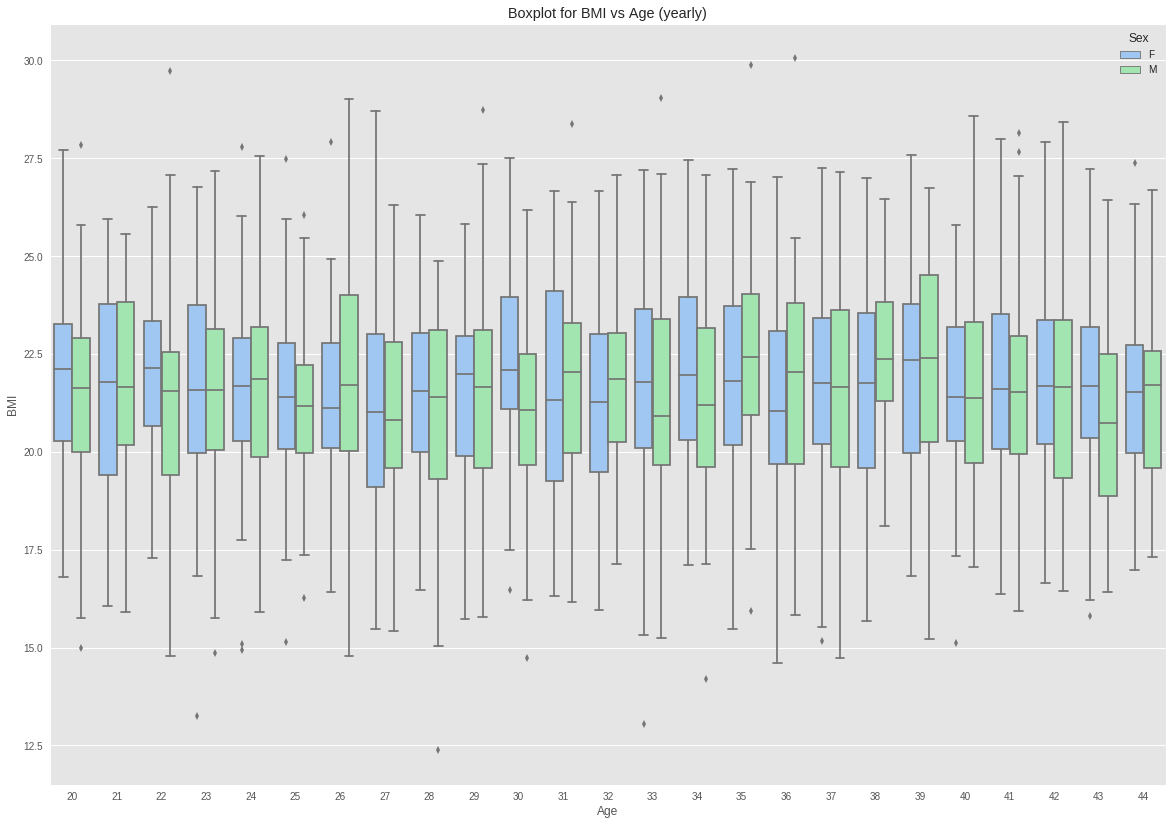

In [153]:
#boxplot for order window vs ticket size
if wholesome == 1:
    plt.figure(figsize = (20,14))
    sns.boxplot(data['Age'], data['BMI'], hue = data['Sex'])
    plt.title('Boxplot for BMI vs Age')
    plt.show()
else:
    plt.figure(figsize = (20,14))
    sns.boxplot(daily_data['Age'], daily_data['BMI'], hue = daily_data['Sex'], palette = 'pastel')
    plt.title('Boxplot for BMI vs Age (daily)')
    plt.show()

    plt.figure(figsize = (20,14))
    sns.boxplot(weekly_data['Age'], weekly_data['BMI'], hue = weekly_data['Sex'], palette = 'pastel')
    plt.title('Boxplot for BMI vs Age (weekly)')
    plt.show()

    plt.figure(figsize = (20,14))
    sns.boxplot(monthly_data['Age'], monthly_data['BMI'], hue = monthly_data['Sex'], palette = 'pastel')
    plt.title('Boxplot for BMI vs Age (monthly)')
    plt.show()

    plt.figure(figsize = (20,14))
    sns.boxplot(yearly_data['Age'], yearly_data['BMI'], hue = yearly_data['Sex'], palette = 'pastel')
    plt.title('Boxplot for BMI vs Age (yearly)')
    plt.show()

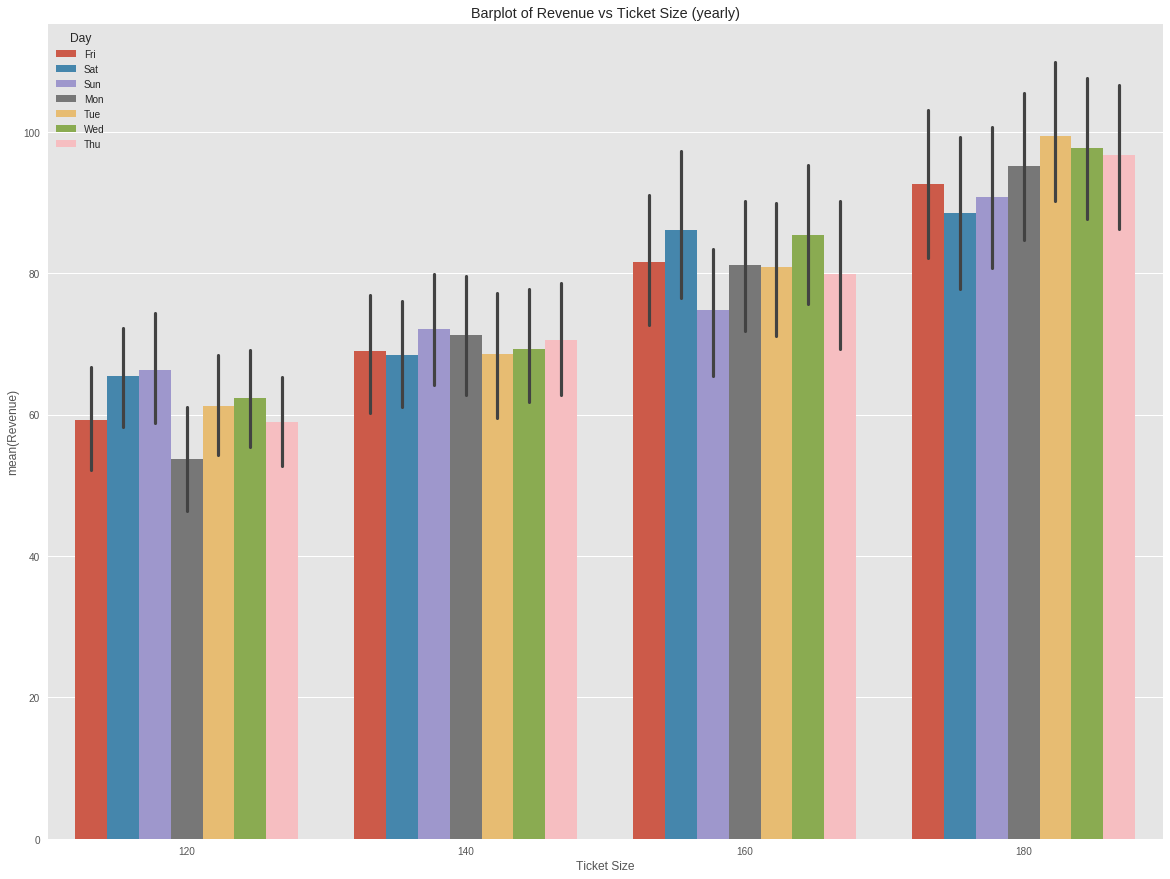

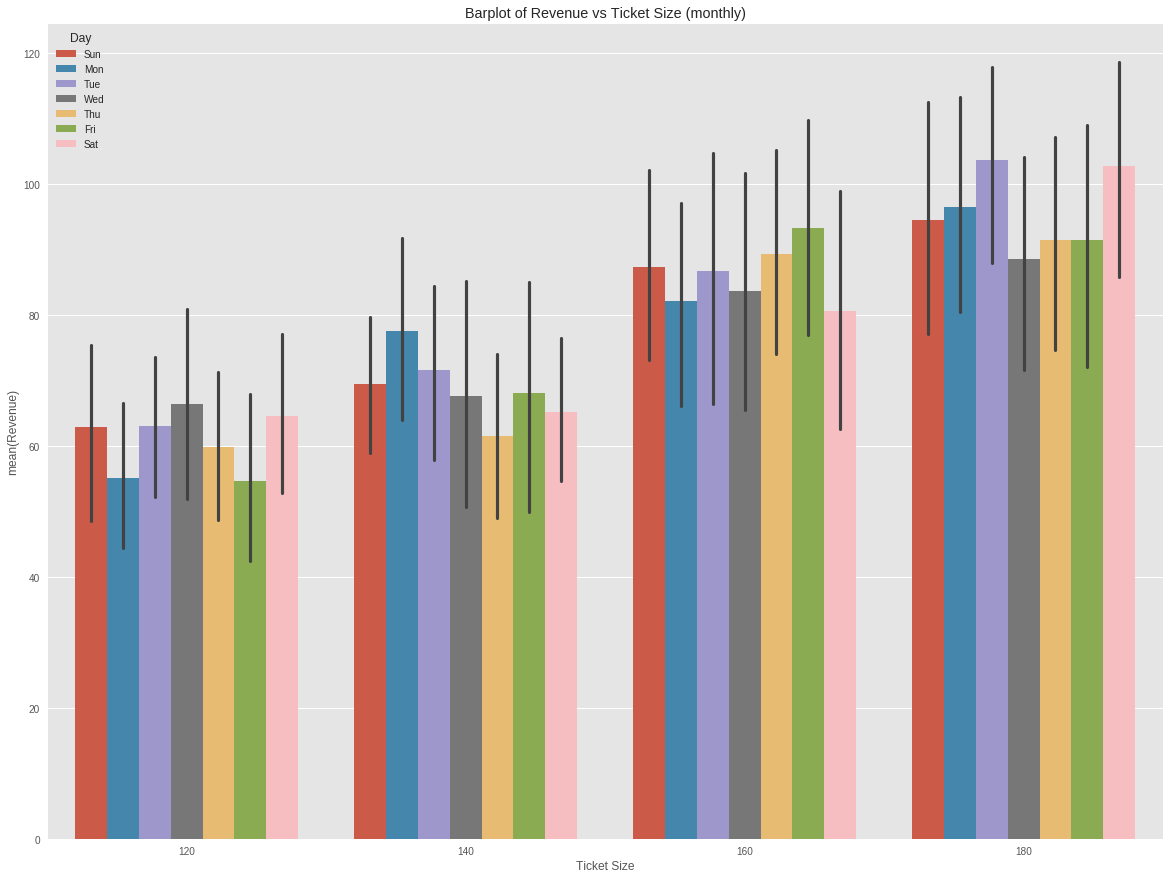

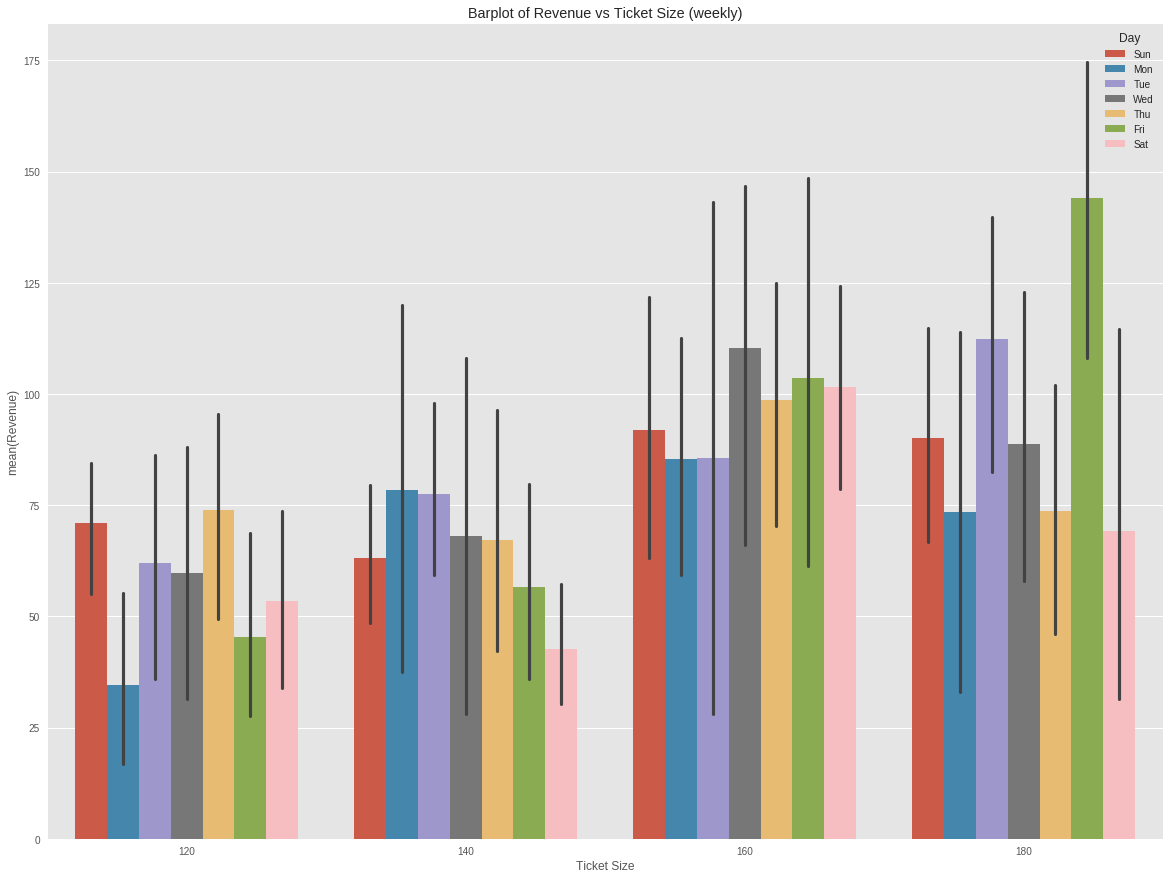

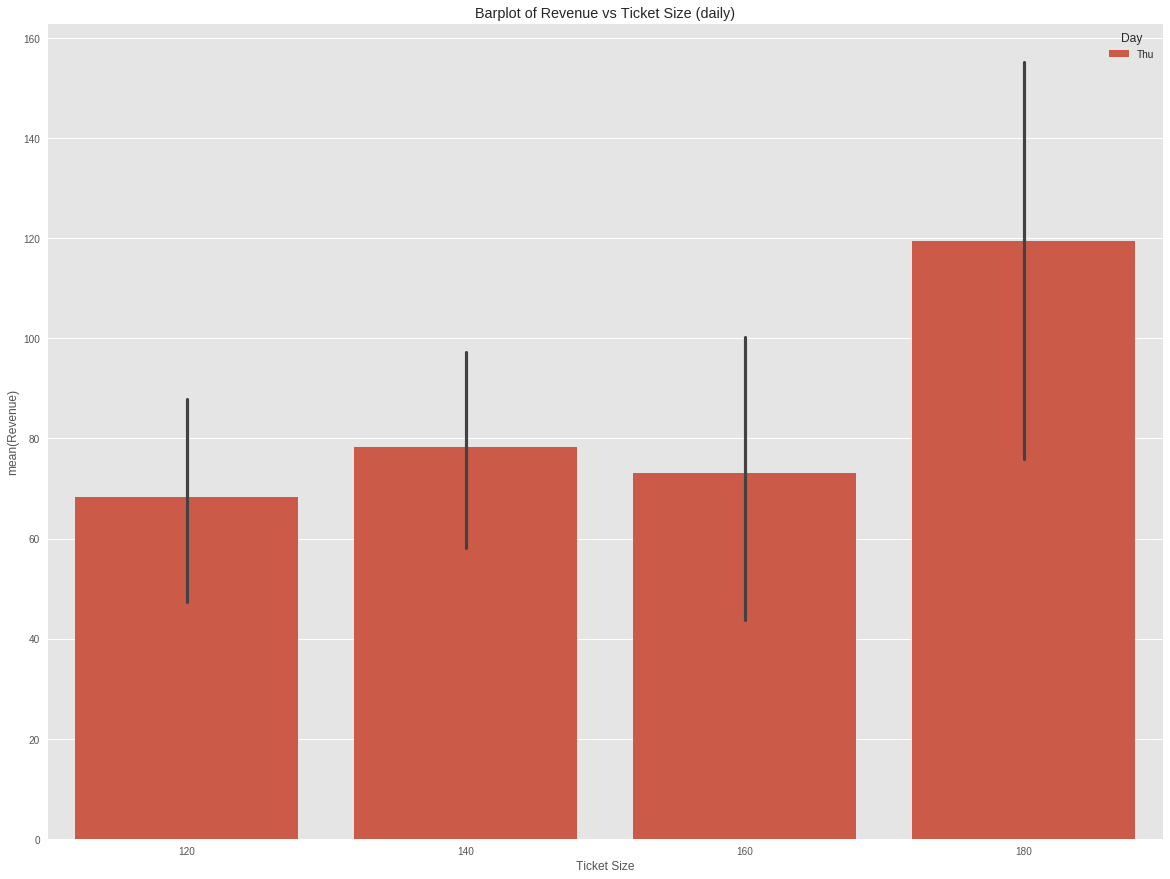

In [154]:
#Revenue
#daily basis barplot of Revenue vs Ticket Size
if wholesome == 1:
    plt.figure(figsize = (20,15))
    sns.barplot(x=data['Ticket Size'], y=data['Revenue'], hue = data['Day'])
    plt.title('Barplot of Revenue vs Ticket Size')
    plt.show()
else:
    plt.figure(figsize = (20,15))
    sns.barplot(x=yearly_data['Ticket Size'], y=yearly_data['Revenue'], hue = yearly_data['Day'])
    plt.title('Barplot of Revenue vs Ticket Size (yearly)')
    plt.show()
    
    plt.figure(figsize = (20,15))
    sns.barplot(x=monthly_data['Ticket Size'], y=monthly_data['Revenue'], hue = monthly_data['Day'])
    plt.title('Barplot of Revenue vs Ticket Size (monthly)')
    plt.show()
    
    plt.figure(figsize = (20,15))
    sns.barplot(x=weekly_data['Ticket Size'], y=weekly_data['Revenue'], hue = weekly_data['Day'])
    plt.title('Barplot of Revenue vs Ticket Size (weekly)')
    plt.show()
    
    plt.figure(figsize = (20,15))
    sns.barplot(x=daily_data['Ticket Size'], y=daily_data['Revenue'], hue = daily_data['Day'])
    plt.title('Barplot of Revenue vs Ticket Size (daily)')
    plt.show()

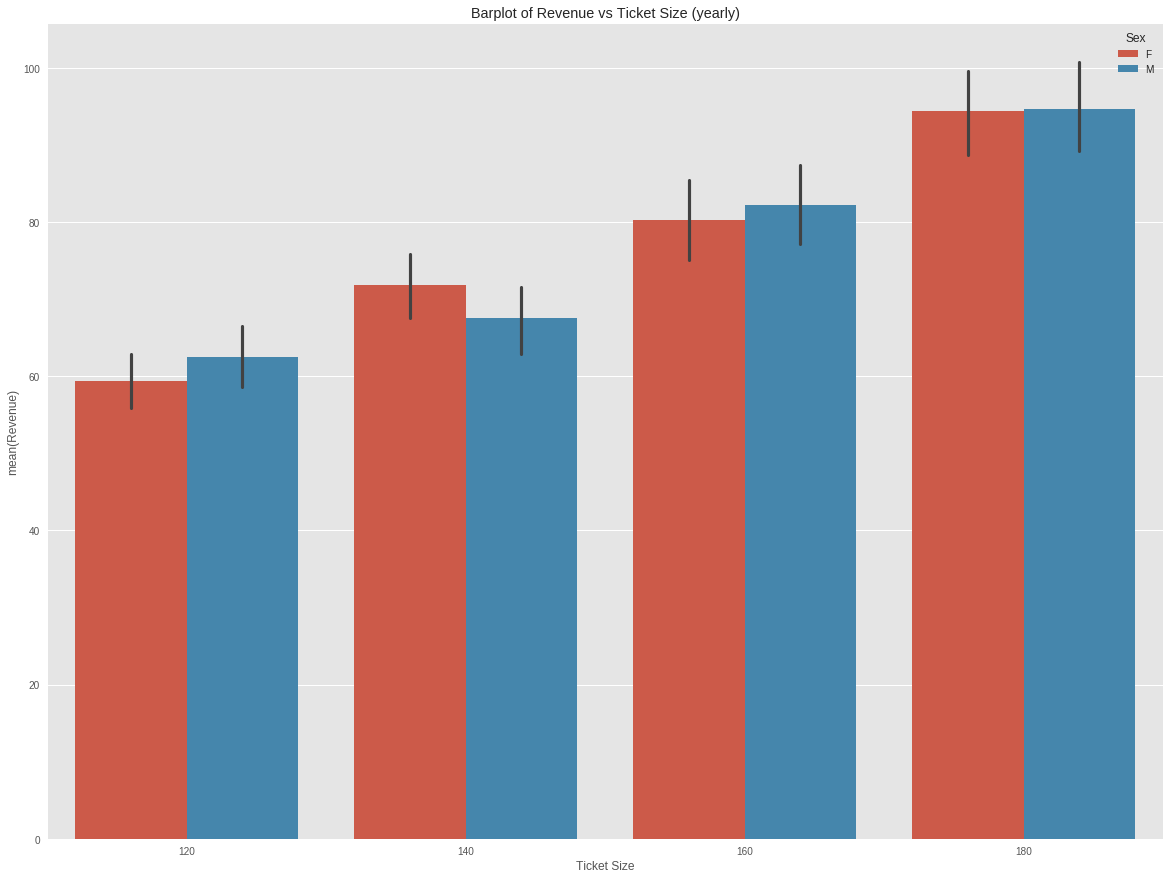

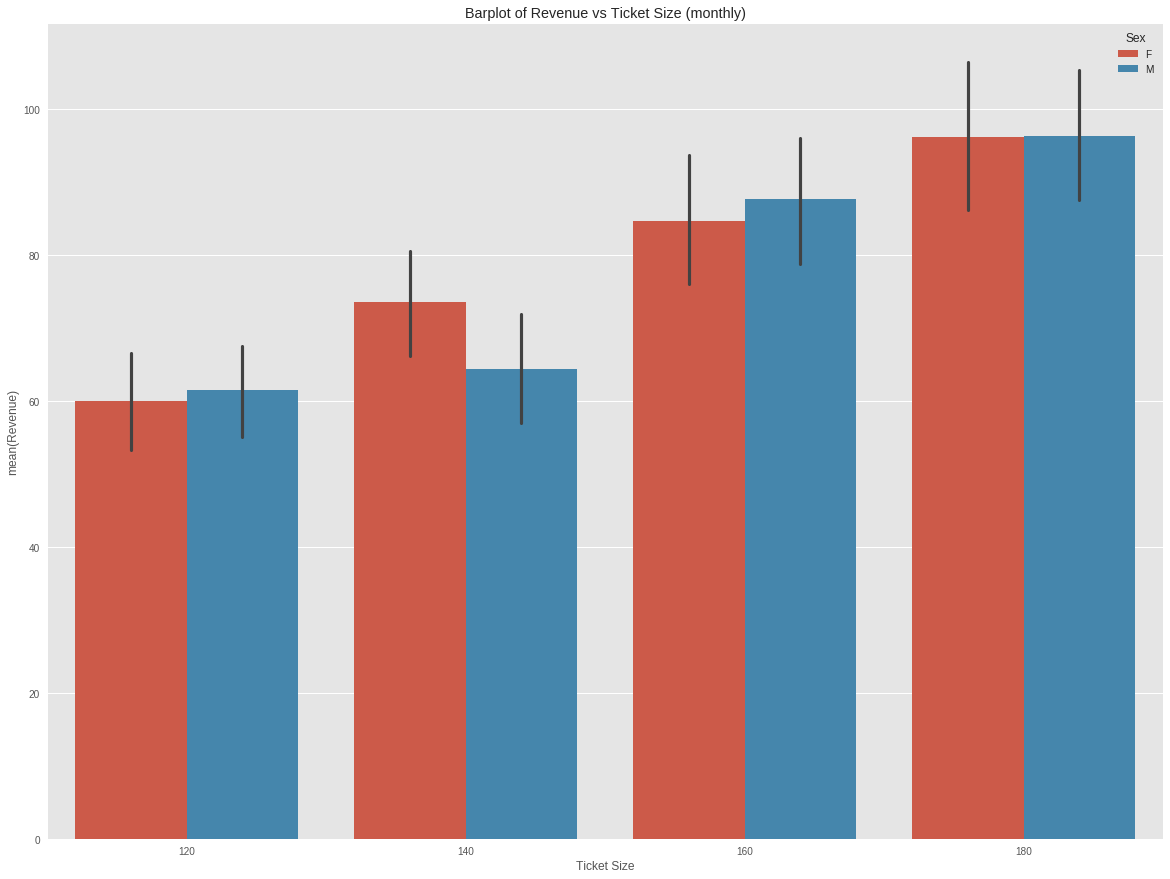

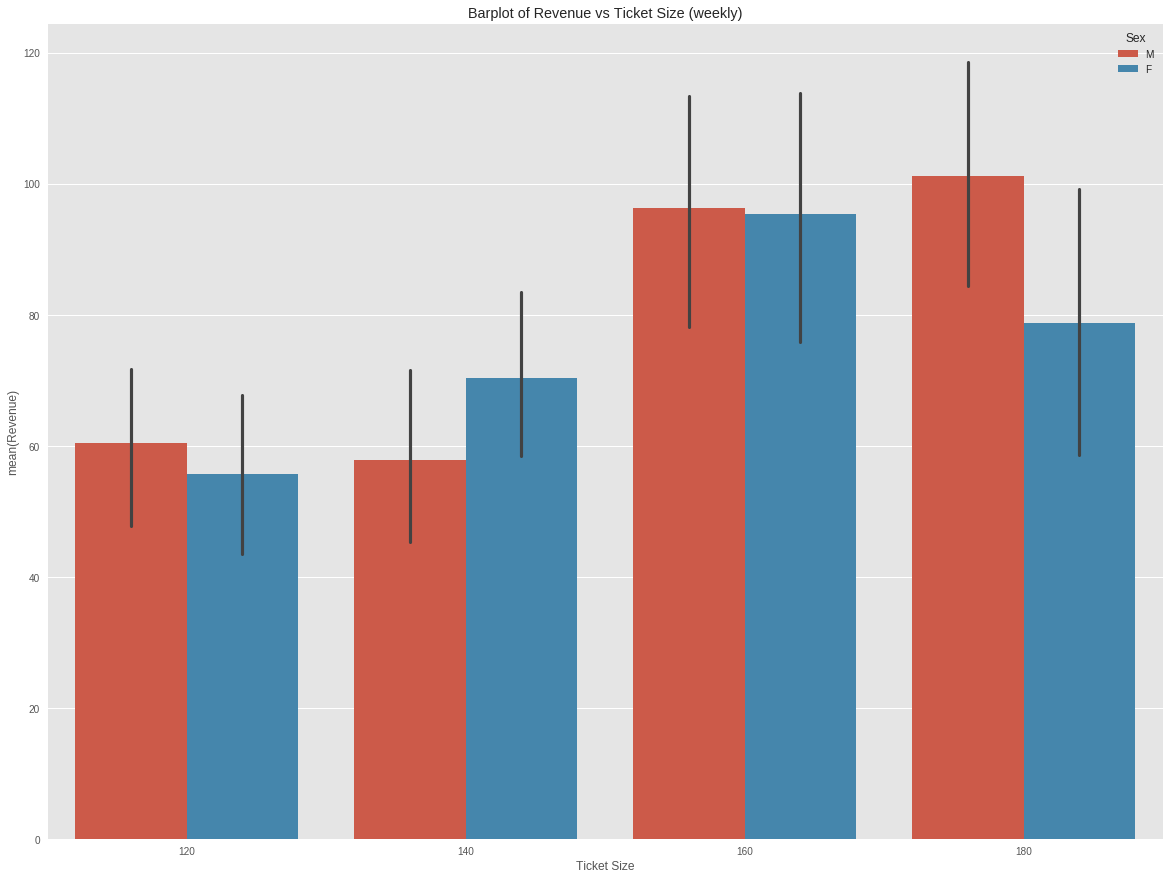

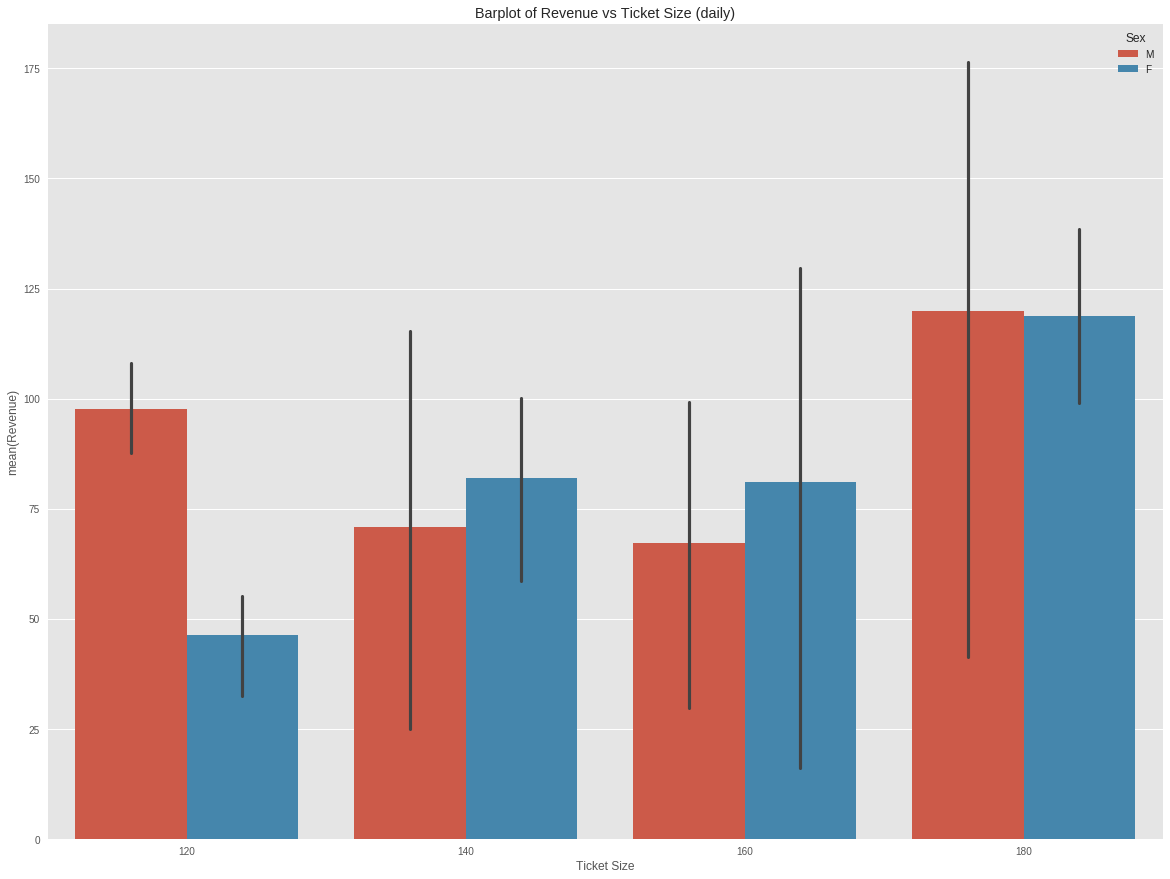

In [155]:
#Revenue
#daily basis barplot of Revenue vs Ticket Size
if wholesome == 1:
    plt.figure(figsize = (20,15))
    sns.barplot(x=data['Ticket Size'], y=data['Revenue'], hue = data['Sex'])
    plt.title('Barplot of Revenue vs Ticket Size')
    plt.show()
else:
    plt.figure(figsize = (20,15))
    sns.barplot(x=yearly_data['Ticket Size'], y=yearly_data['Revenue'], hue = yearly_data['Sex'])
    plt.title('Barplot of Revenue vs Ticket Size (yearly)')
    plt.show()
    
    plt.figure(figsize = (20,15))
    sns.barplot(x=monthly_data['Ticket Size'], y=monthly_data['Revenue'], hue = monthly_data['Sex'])
    plt.title('Barplot of Revenue vs Ticket Size (monthly)')
    plt.show()
    
    plt.figure(figsize = (20,15))
    sns.barplot(x=weekly_data['Ticket Size'], y=weekly_data['Revenue'], hue = weekly_data['Sex'])
    plt.title('Barplot of Revenue vs Ticket Size (weekly)')
    plt.show()
    
    plt.figure(figsize = (20,15))
    sns.barplot(x=daily_data['Ticket Size'], y=daily_data['Revenue'], hue = daily_data['Sex'])
    plt.title('Barplot of Revenue vs Ticket Size (daily)')
    plt.show()